In [1]:
import numpy as np
import matplotlib.pyplot as plt
import psydac.core.interface as inter
import utilitis_opt as utils 

In [38]:
T = inter.make_open_knots(p, Nbase)*Lz
t = T[1:-1]

D = inter.collocation_matrix(p - 1, Nbase - 1, t, np.array([Lz/2 - 25.0]))

for j in range(Nbase - 1):
    D[:, j] = p*D[:, j]/(t[j + p] - t[j])

In [39]:
Bx = np.dot(bx, D.T).flatten()

(300, 1300)

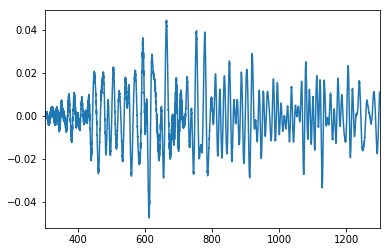

In [79]:
plt.plot(tn, Bx)
plt.xlim((300, 1300))

In [67]:
f, ti, Sxx = signal.spectrogram(Bx, 1/0.1, nperseg=400, noverlap=100)
om = 2*np.pi*f

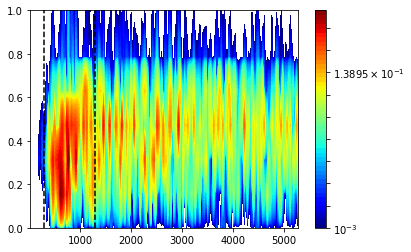

In [78]:
lvls = np.logspace(-3, 0, 50)
plt.contourf(ti, om, Sxx/Sxx.max(), 100, norm = LogNorm(), levels = lvls, cmap = 'jet')
plt.ylim((0, 1))
#plt.xlim((0, 10000))
plt.colorbar()
plt.plot(np.ones(10)*300, np.linspace(0, 1.0, 10), 'k--')
plt.plot(np.ones(10)*1300, np.linspace(0, 1.0, 10), 'k--')

In [68]:
ti

array([  20.,   50.,   80.,  110.,  140.,  170.,  200.,  230.,  260.,
        290.,  320.,  350.,  380.,  410.,  440.,  470.,  500.,  530.,
        560.,  590.,  620.,  650.,  680.,  710.,  740.,  770.,  800.,
        830.,  860.,  890.,  920.,  950.,  980., 1010., 1040., 1070.,
       1100., 1130., 1160., 1190., 1220., 1250., 1280., 1310., 1340.,
       1370., 1400., 1430., 1460., 1490., 1520., 1550., 1580., 1610.,
       1640., 1670., 1700., 1730., 1760., 1790., 1820., 1850., 1880.,
       1910., 1940., 1970., 2000., 2030., 2060., 2090., 2120., 2150.,
       2180., 2210., 2240., 2270., 2300., 2330., 2360., 2390., 2420.,
       2450., 2480., 2510., 2540., 2570., 2600., 2630., 2660., 2690.,
       2720., 2750., 2780., 2810., 2840., 2870., 2900., 2930., 2960.,
       2990., 3020., 3050., 3080., 3110., 3140., 3170., 3200., 3230.,
       3260., 3290., 3320., 3350., 3380., 3410., 3440., 3470., 3500.,
       3530., 3560., 3590., 3620., 3650., 3680., 3710., 3740., 3770.,
       3800., 3830.,

In [27]:
data = np.loadtxt('test_rel.txt')

In [28]:
tn = data[1:, -1]
en_E = data[1:, -5]
en_B = data[1:, -4]
en_C = data[1:, -3]
en_H = data[1:, -2]

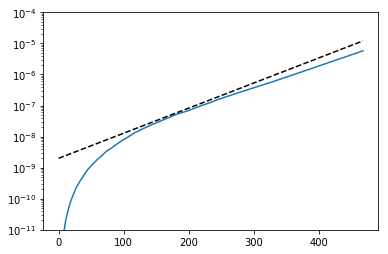

In [35]:
plt.semilogy(tn, en_B)
plt.ylim((1e-11, 1e-4))

gamma = 
plt.semilogy(tn, 2e-9*np.exp(2*gamma*tn), 'k--')

In [2]:
data = np.loadtxt('test_maxgrowth_rel2.txt')

In [5]:
tn = data[1:, -1]
en_E = data[1:, -5]
en_B = data[1:, -4]
en_C = data[1:, -3]
en_H = data[1:, -2]

pa = data[0]

In [7]:
pa[11]

0.55

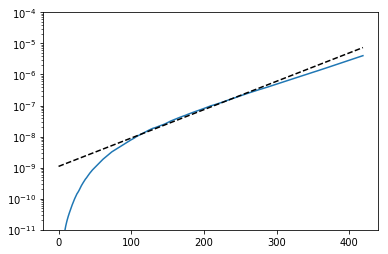

In [10]:
plt.semilogy(tn, en_B)
plt.ylim((1e-11, 1e-4))

gamma = 0.010517837152266217
plt.semilogy(tn, 1.1e-9*np.exp(2*gamma*tn), 'k--')

In [24]:
data = np.loadtxt('test_maxgrowth.txt')

In [25]:
tn = data[1:, -1]
en_E = data[1:, -5]
en_B = data[1:, -4]
en_C = data[1:, -3]
en_H = data[1:, -2]

(1e-34, 1e-30)

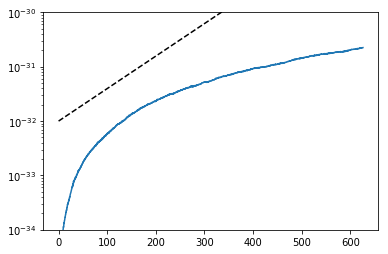

In [26]:
plt.semilogy(tn, en_B)

omega = utils.solveDispersionHybrid(2., +1, 1., -1., 5., 0.2, 0.53, 6e-3, 0.2 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, 1e-32*np.exp(2*gamma*tn), 'k--')
plt.ylim((1e-34, 1e-30))

In [12]:
p = 3
Nbase = 32
Lz = 327.7

T = inter.make_open_knots(p, Nbase)*Lz
t = T[1:-1]

D = inter.collocation_matrix(p - 1, Nbase - 1, t, np.array([Lz/2 - 25.0]))

for j in range(Nbase - 1):
    D[:, j] = p*D[:, j]/(t[j + p] - t[j])

In [16]:
np.dot(np.random.rand(31), D.flatten())

0.04041426539139904

In [2]:
data = np.loadtxt('test_dipoleRel.txt')

In [3]:
tn = data[:, 5]
en_E = data[:, 1]
en_B = data[:, 2]
en_C = data[:, 3]
en_H = data[:, 4]

Bx = data[:, 0]
Lz = 327.7

Text(0,0.5,'$E_B$')

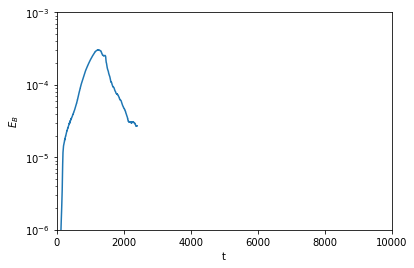

In [6]:
plt.semilogy(tn, en_B/Lz)
plt.xlim((0, 10000))
plt.ylim((1e-6, 1e-3))
plt.xlabel('t')
plt.ylabel('$E_B$')

Text(0,0.5,'$B_x$')

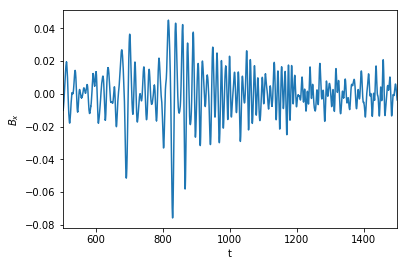

In [7]:
plt.plot(tn, Bx)
plt.xlim((500, 1500))
plt.xlabel('t')
plt.ylabel('$B_x$')

In [8]:
from scipy import signal
from matplotlib.colors import LogNorm

In [32]:
f, ti, Sxx = signal.spectrogram(Bx, 1/0.04, nperseg=2500, noverlap=1000)
om = 2*np.pi*f

Text(0,0.5,'$\\omega$')

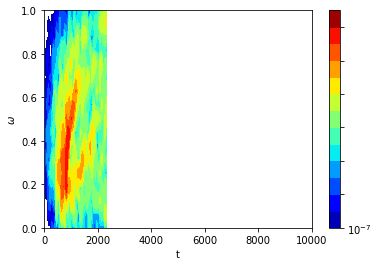

In [33]:
lvls = np.logspace(-7, -1, 2*7)
plt.contourf(ti, om, Sxx, 100, norm = LogNorm(), levels = lvls, cmap = 'jet')
plt.ylim((0, 1))
plt.xlim((0, 10000))
plt.colorbar()
#plt.plot(np.ones(10)*300, np.linspace(0, 1.0, 10), 'k--')
#plt.plot(np.ones(10)*1300, np.linspace(0, 1.0, 10), 'k--')

plt.xlabel('t')
plt.ylabel('$\omega$')

In [27]:
f, ti, Sxx = signal.stft(Bx, 1/0.04, nperseg=3000, noverlap=2000)
om = 2*np.pi*f

Text(0,0.5,'$\\omega$')

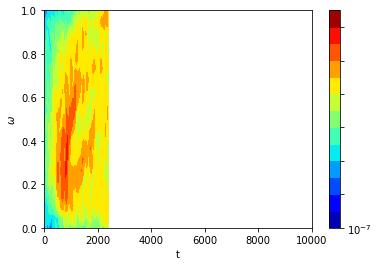

In [29]:
lvls = np.logspace(-7, -1, 2*7)
plt.contourf(ti, om, np.abs(Sxx), 100, norm = LogNorm(), levels = lvls, cmap = 'jet')
plt.ylim((0, 1))
plt.xlim((0, 10000))
plt.colorbar()
#plt.plot(np.ones(10)*300, np.linspace(0, 1.0, 10), 'k--')
#plt.plot(np.ones(10)*1300, np.linspace(0, 1.0, 10), 'k--')

plt.xlabel('t')
plt.ylabel('$\omega$')

In [3]:
data = np.loadtxt('test_dipoleRel_NoCV.txt')

In [8]:
tn = data[:, 5]
en_E = data[:, 1]
en_B = data[:, 2]
en_C = data[:, 3]
en_H = data[:, 4]

Bx = data[:, 0]
Lz = 327.7

(1e-07, 0.0001)

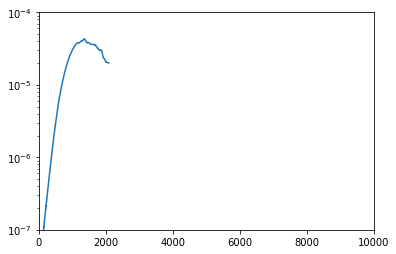

In [9]:
plt.semilogy(tn, en_B/327.7)
plt.xlim((0, 10000))
plt.ylim((1e-7, 1e-4))

In [ ]:
plt.plot(tn, Bx)
plt.xlim((500, 1500))